## Final exercises

#### Exercise 1: Prioritization of SARS-Cov-2 targets based on network centralities
- Extract sub-network of known SARS-Cov-2 targets from the human interactome
- Calculate the centralities for each target
- Identify the genes that are ranked highly by the degree centrality, closeness centrality and betweenness centrality.
- Are there any genes that are common?

<strong>Files to use:</strong>
- Human interactome: Data/Barabasi_CoV2_PPI.csv
- SARS-Cov-2 targets: Data/SARSCoV2_Targets.csv


In [46]:
# Upload python modules
import networkx as nx
import pandas as pd
import numpy as np
# Import python modules for visualizations
import matplotlib.pylab as plt

%matplotlib inline

In [22]:
# Reading the human interactome from Gysi et al., 2021 
edge_list = pd.read_csv("Data/Barabasi_CoV2_PPI.csv")

# Creating network from edge list 
Barabasi_human_interactome = nx.from_pandas_edgelist(df = edge_list,
                                                        source = "proteinA_entrezid", 
                                                        target = "proteinB_entrezid")

# human_int_pos = nx.spring_layout(Barabasi_human_interactome, seed = 123)
# nx.draw(Barabasi_human_interactome, with_labels = True, pos = human_int_pos, node_size = 1000, node_color = "#1BB3F5")

In [24]:
# Extract the largest connected component
Barabasi_human_interactome = list(Barabasi_human_interactome.subgraph(c).copy() for c in sorted(nx.connected_components(Barabasi_human_interactome), key = len, reverse = True))[0]
print(len(Barabasi_human_interactome.nodes()), len(Barabasi_human_interactome.edges()))
# nx.draw(Barabasi_human_interactome, with_labels = True, node_size = 1000, node_color = "#1BB3F5")

18446 327868


In [25]:
# Remove self-loops
Barabasi_human_interactome.remove_edges_from(nx.selfloop_edges(Barabasi_human_interactome))

In [27]:
# Read the targets for SARS-Cov-2
SarsCov_targets = pd.read_csv('./Data/SARSCoV2_Targets.csv')
SarsCov_targets.head()

,SARS,EntrezID,Symbol
0,sars-cov2e,8546,AP3B1
1,sars-cov2e,23476,BRD4
2,sars-cov2e,6046,BRD2
3,sars-cov2e,10283,CWC27
4,sars-cov2e,124245,ZC3H18


In [28]:
# Extract sub-network of SARS-Cov-2 targets
SarsCov_net = Barabasi_human_interactome.subgraph(list(SarsCov_targets["EntrezID"]))
print(len(SarsCov_net.nodes()), len(SarsCov_net.edges()))

332 382


In [30]:
# Calculate the centralities for genes in the SARS-Cov-2 target network
degree_centrality = nx.degree_centrality(SarsCov_net)
betweenness_centrality = nx.betweenness_centrality(SarsCov_net)
closeness_centrality = nx.closeness_centrality(SarsCov_net)
centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality)})
centrality_table

,Degree centrality,Betweenness,Closeness centrality
79877,0.000000,0.000000,0.000000
10270,0.006042,0.000646,0.138749
34,0.003021,0.000000,0.003021
10280,0.003021,0.000000,0.102254
10283,0.000000,0.000000,0.000000
...,...,...,...
10204,0.012085,0.005688,0.144640
55285,0.009063,0.002405,0.147441
2040,0.018127,0.042168,0.147273
10238,0.006042,0.000634,0.134427


In [59]:
# Print top 10 genes by centrality
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:10].index)
top_betweenness = list(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:10].index)
top_closeness = list(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:10].index)

print(top_degree)
print(top_betweenness)
print(top_closeness)

[5566, 5576, 10956, 11116, 55755, 5318, 166, 2801, 10142, 7879]
[5318, 5566, 8021, 2801, 7879, 2040, 1460, 10956, 6731, 166]
[5318, 5566, 2801, 10142, 1460, 5910, 5576, 56915, 166, 4140]


In [63]:
# Identify the genes that are common
# These genes might be more important
select_genes = list(set(top_degree) & set(top_betweenness) & set(top_closeness))
select_genes

[2801, 5566, 5318, 166]

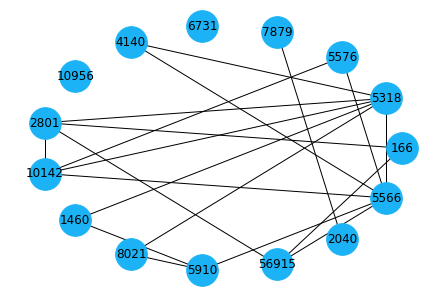

In [79]:
# Draw network consisting of the top 10 genes in each category
select_genes = list(np.unique(top_closeness + top_betweenness + top_closeness))
SarsCov_net_top = Barabasi_human_interactome.subgraph(select_genes)
pos = nx.circular_layout(SarsCov_net_top)
nx.draw(SarsCov_net_top, with_labels = True, pos = pos, node_size = 1000, node_color = "#1BB3F5")

#### Exercise 2: Identify network modules in human interactome consisting of known SARS-Cov-2 targets
- Indentify modules in the human interactome using Girvan-Newman method
- For each module detected check how many known SARS-Cov-2 targets it contain


In [81]:
# Upload python modules
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
# Import python modules for visualizations
import matplotlib.pylab as plt

%matplotlib inline

In [82]:
# Reading the human interactome from Gysi et al., 2021 
edge_list = pd.read_csv("Data/Barabasi_CoV2_PPI.csv")

# Creating network from edge list 
Barabasi_human_interactome = nx.from_pandas_edgelist(df = edge_list,
                                                        source = "proteinA_entrezid", 
                                                        target = "proteinB_entrezid")

# human_int_pos = nx.spring_layout(Barabasi_human_interactome, seed = 123)
# nx.draw(Barabasi_human_interactome, with_labels = True, pos = human_int_pos, node_size = 1000, node_color = "#1BB3F5")

In [83]:
# Extract the largest connected component
Barabasi_human_interactome = list(Barabasi_human_interactome.subgraph(c).copy() for c in sorted(nx.connected_components(Barabasi_human_interactome), key = len, reverse = True))[0]
print(len(Barabasi_human_interactome.nodes()), len(Barabasi_human_interactome.edges()))
# nx.draw(Barabasi_human_interactome, with_labels = True, node_size = 1000, node_color = "#1BB3F5")

18446 327868


In [84]:
# Remove self-loops
Barabasi_human_interactome.remove_edges_from(nx.selfloop_edges(Barabasi_human_interactome))

In [85]:
# Use Girvan-Newman algorithm to detect communities in the network
community = girvan_newman(Barabasi_human_interactome)
community = tuple(sorted(c) for c in next(community))
community

In [ ]:
# Read the targets for SARS-Cov-2
SarsCov_targets = pd.read_csv('./Data/SARSCoV2_Targets.csv')
SarsCov_targets.head()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6f9e27d-71eb-4664-8c0d-e7e02cc44214' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>